In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [29]:
import warnings
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


## utiliser selenium pour obtenir les vrais informations dans journaux 

In [26]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

# Initialiser le navigateur Chrome
# driver = webdriver.Chrome('/chemin/vers/votre/chromedriver')
cService = webdriver.ChromeService(executable_path='/usr/local/bin/chromedriver')
driver = webdriver.Chrome(service = cService)
# Liste des sites de journaux à parcourir
sites = [
    "https://www.nytimes.com",
    "https://www.bbc.com/news",
    # "https://www.cnn.com",
    "https://www.reuters.com/world/",
    # "https://www.newsweek.com",
    # "https://www.livemint.com",
    # "https://www.indiatimes.com",
    # "https://www.hindustantimes.com",
    # "https://www.india.com",
    # "https://www.express.co.uk",
    # "https://www.independent.co.uk",
    # "https://www.foxnews.com",
    # "https://www.msn.com"
]

data = []
# Aller sur le site de la BBC
for site in sites:
    driver.get(site)
    # driver.get('https://www.bbc.com/news')

    # Récupérer le contenu de la page
    content = driver.page_source

    # Utiliser BeautifulSoup pour analyser le contenu
    soup = BeautifulSoup(content)

    # Trouver toutes les nouvelles
    if site in ["https://www.cnn.com", "https://www.reuters.com/world/", "https://www.newsweek.com", "https://www.foxnews.com", "https://www.msn.com"]:
        news = soup.find_all('h3')
    elif site in ["https://www.nytimes.com/international/section/world",]:
        news = soup.find_all('article')
    else:   
        news = soup.find_all('h2')


    # Préparer une liste pour stocker les données


    for new in news:
        data.append([new.text])
        

# Créer un DataFrame avec les données
df = pd.DataFrame(data, columns=['text'])

# Enregistrer les données dans un fichier CSV
df.to_csv('news.csv', index=False)

# Fermer le navigateur
driver.quit()

ModuleNotFoundError: No module named 'selenium'

In [30]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [31]:
df_fake["class"] = 0
df_true["class"] = 1

In [32]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [33]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [34]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [35]:
df_new = pd.read_csv("news.csv")
df_new["class"] = 1

In [36]:
df_new.shape

(88, 2)

In [37]:
df = pd.concat([df, df_new], axis =0 )

In [38]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
83,"CheckpointNew Tab, opens new tabThe industry l...",1
84,"WorkspaceNew Tab, opens new tabAccess unmatche...",1
85,"Data CatalogueNew Tab, opens new tab Browse an...",1
86,"World-CheckNew Tab, opens new tabScreen for he...",1


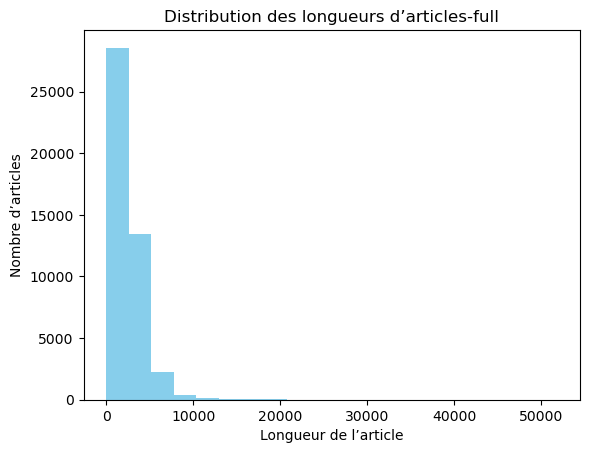

In [ ]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque article
df['length'] = df['text'].apply(len)

# Créer un histogramme des longueurs d'articles
plt.hist(df['length'], bins=20, color='skyblue')
plt.title('Distribution des longueurs d’articles-full')
plt.xlabel('Longueur de l’article')
plt.ylabel('Nombre d’articles')
plt.show()


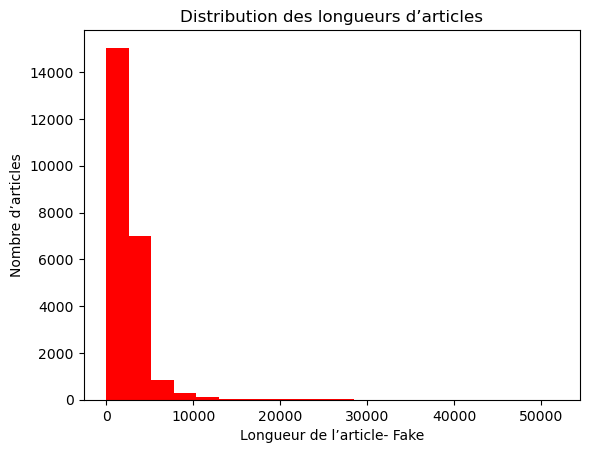

In [ ]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque article
df_fake['length'] = df_fake['text'].apply(len)

# Créer un histogramme des longueurs d'articles
plt.hist(df_fake['length'], bins=20, color='red')
plt.title('Distribution des longueurs d’articles')
plt.xlabel('Longueur de l’article- Fake')
plt.ylabel('Nombre d’articles')
plt.show()

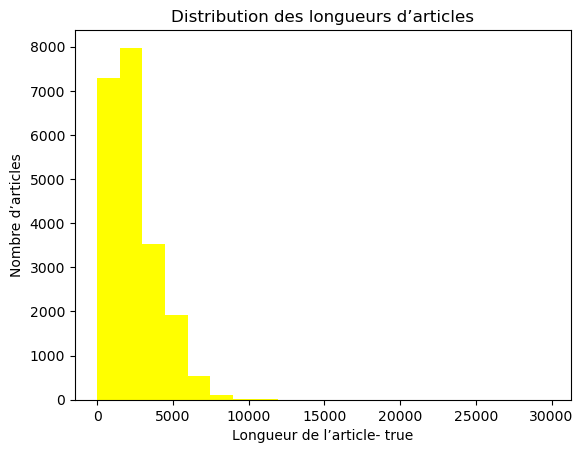

In [ ]:
# Calculer la longueur de chaque article
df_true['length'] = df_true['text'].apply(len)

# Créer un histogramme des longueurs d'articles
plt.hist(df_true['length'], bins=20, color='yellow')
plt.title('Distribution des longueurs d’articles')
plt.xlabel('Longueur de l’article- true')
plt.ylabel('Nombre d’articles')
plt.show()

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

## Creating the Bag of Words

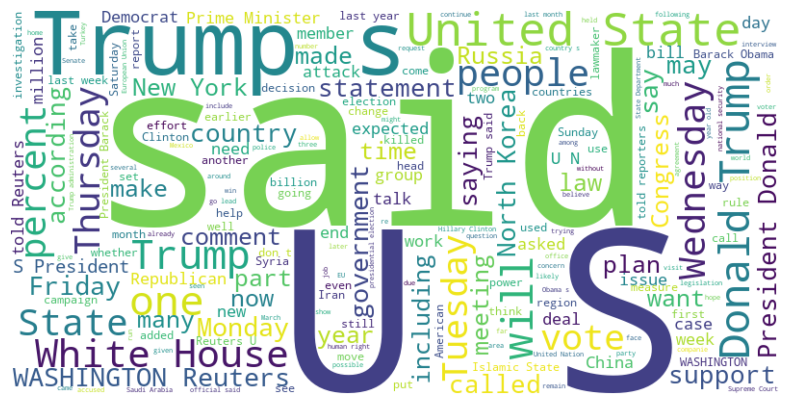

In [ ]:
from wordcloud import WordCloud

# Concaténer tous les articles en un seul texte
all_text = ' '.join(df_true['text'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

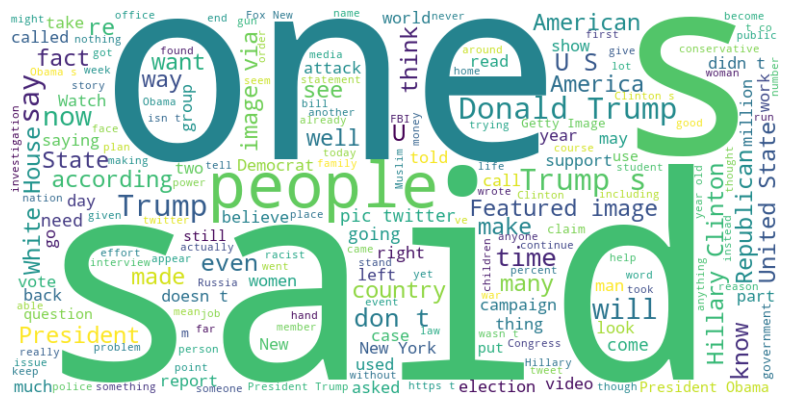

In [ ]:
from wordcloud import WordCloud

# Concaténer tous les articles en un seul texte
all_text = ' '.join(df_fake['text'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [73]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_49873/3432647204.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_49873/3432647204.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_49873/3432647204.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


# Text Pre-processing

In [40]:
df["text"] = df["text"].apply(text_preprocess)

In [41]:
df["text"] = df["text"].agg(lambda x: ' '.join(map(str, x)))

/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_49873/130294408.py:1: FutureWarning: using <function <lambda> at 0x1683dc4a0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df["text"] = df["text"].agg(lambda x: ' '.join(map(str, x)))


In [42]:
df.head()

,text,class
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [43]:
x = df["text"]
y = df["class"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42, shuffle = True, stratify = y)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression


In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [47]:
pred_lr=LR.predict(xv_test)

In [48]:
LR.score(xv_test, y_test)

0.98421871527006

In [50]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4697
           1       0.98      0.98      0.98      4301

    accuracy                           0.98      8998
   macro avg       0.98      0.98      0.98      8998
weighted avg       0.98      0.98      0.98      8998



## Decision Tree Classification


In [51]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [52]:
pred_dt = DT.predict(xv_test)

In [53]:
DT.score(xv_test, y_test)

0.9941098021782618

In [54]:
import pickle 

In [55]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4697
           1       0.99      0.99      0.99      4301

    accuracy                           0.99      8998
   macro avg       0.99      0.99      0.99      8998
weighted avg       0.99      0.99      0.99      8998



## Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [57]:
pred_gbc = GBC.predict(xv_test)

In [58]:
GBC.score(xv_test, y_test)

0.9933318515225605

In [59]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4697
           1       0.99      0.99      0.99      4301

    accuracy                           0.99      8998
   macro avg       0.99      0.99      0.99      8998
weighted avg       0.99      0.99      0.99      8998



## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [61]:
pred_rfc = RFC.predict(xv_test)

In [62]:
RFC.score(xv_test, y_test)

0.9874416537008224

In [63]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4697
           1       0.99      0.99      0.99      4301

    accuracy                           0.99      8998
   macro avg       0.99      0.99      0.99      8998
weighted avg       0.99      0.99      0.99      8998



In [74]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(text_preprocess) 
    new_def_test["text"] = new_def_test["text"].agg(lambda x: ' '.join(map(str, x)))
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))



In [83]:
news_one=" A U.S. appeals court on Friday said President Donald Trump’s hotly contested travel ban targeting people from six Muslim-majority countries should not be applied to people with strong U.S. ties. The 9th U.S. Circuit Court of Appeals, which covers several West Coast states, also said its ruling would be put on hold pending a decision on the latest version of the travel ban from the Trump administration by the U.S. Supreme Court. Since taking office in January, Trump has been struggling to enact a ban that passes court muster. A three-judge panel from the 9th Circuit narrowed a previous injunction from a lower federal court to those people “with a credible bona fide relationship with the United States.” It also said that while the U.S. president has broad powers to regulate the entry of immigrants into the United States, those powers are not without limits. “We conclude that the President’s issuance of the Proclamation once again exceeds the scope of his delegated authority,” the panel said. The ban targets people from Chad, Iran, Libya, Somalia, Syria and Yemen seeking to enter the United States. Trump, a Republican, has said the travel ban is needed to protect the United States from terrorism. The state of Hawaii, however, challenged it in court, and a Honolulu federal judge said it exceeded Trump’s powers under immigration law. Trump’s ban also covers people from North Korea and certain government officials from Venezuela, but the lower courts had already allowed those provisions to go into effect. The same three-judge 9th Circuit panel, which limited a previous version of Trump’s ban, heard arguments earlier this month. Trump issued his first travel ban targeting several Muslim-majority countries in January, which caused chaos at airports and mass protests. He issued a revised one in March after the first was blocked by federal courts. That expired in September after a court fight and was replaced with the current version. The ban has some exceptions. Certain people from each targeted country can still apply for a visa for tourism, business or education purposes, and applicants can ask for an individual waiver. “We are pleased that the Supreme Court has already allowed the government to implement the proclamation and keep all Americans safe while this matter is litigated. We continue to believe that the order should be allowed to take effect in its entirety,” U.S. Justice Department spokeswoman Lauren Ehrsam said in a statement."

In [84]:
news = str(news_one)

In [85]:

manual_testing(news)



LR Prediction: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not A Fake News


/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_49873/316000210.py:11: FutureWarning: using <function manual_testing.<locals>.<lambda> at 0x316962c00> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  new_def_test["text"] = new_def_test["text"].agg(lambda x: ' '.join(map(str, x)))
